In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

creating new log file
2022-01-13 20:33:01,758 [INFO] WRITING LOG OUTPUT TO C:\Users\puzheng\.cellpose\run.log
32828


## load codebook

In [2]:
# load codebook
import pandas as pd
codebook_filename = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-11_brain\Summary_tables\CTP11-mouse-genome-1000_codebook.csv'
codebook_df = pd.read_csv(codebook_filename)
codebook_df.set_index('name')
codebook = np.array(codebook_df[[_name for _name in codebook_df.columns if 'NDB_' in _name]])
print(codebook.shape)
codebook_df

2022-01-13 20:33:03,513 [INFO] Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-01-13 20:33:03,514 [INFO] NumExpr defaulting to 8 threads.
(988, 99)


,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_824,NDB_712,NDB_818,NDB_940,NDB_872,NDB_934,NDB_926,NDB_910,chr,chr_order
0,1:3740000-3760000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1:6240000-6260000,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,1:8740000-8760000,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
3,1:11240000-11260000,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,3
4,1:13740000-13760000,5,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,X:161240000-161260000,1057,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,X,52
984,X:163740000-163760000,1058,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,X,53
985,X:166240000-166260000,1059,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,X,54
986,X:168740000-168760000,1060,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,X,55


In [16]:
codebook

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## load spot files

In [47]:
spot_file_folder = r'M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\CandSpots'

spot_filenames = [os.path.join(spot_file_folder, _fl) for _fl in os.listdir(spot_file_folder)]
# remove first 2 fov for now
spot_filenames = [_fl for _fl in spot_filenames if int(_fl.split('Conv_zscan_')[1].split('_')[0]) > 2]

M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\CandSpots\Conv_zscan_003_Cell-6_CandSpots.pkl 6979
- Skip loading because file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Decoder\Conv_zscan_003_Cell-6_Decoder.pkl doesn't exists
7995 pairs kept given search radius 250 nm.


7995it [00:22, 350.92it/s]


- 6886 spot groups selected. 
-- seeding chr:1 with 77 regions with 105 spot_groups
- diff in iter-0: 0.7619
- diff in iter-1: 0.0381
- diff in iter-2: 0.0000
-- seeding chr:10 with 51 regions with 52 spot_groups
- diff in iter-0: 0.8077
- diff in iter-1: 0.0385
- diff in iter-2: 0.0000
-- seeding chr:11 with 48 regions with 46 spot_groups
- diff in iter-0: 0.8913
- diff in iter-1: 0.0217
- diff in iter-2: 0.0217
- diff in iter-3: 0.0000
-- seeding chr:12 with 43 regions with 67 spot_groups
- diff in iter-0: 0.7463
- diff in iter-1: 0.0149
- diff in iter-2: 0.0149
- diff in iter-3: 0.0000
-- seeding chr:13 with 45 regions with 40 spot_groups
- diff in iter-0: 0.8000
- diff in iter-1: 0.0000
-- seeding chr:14 with 42 regions with 47 spot_groups
- diff in iter-0: 0.8298
- diff in iter-1: 0.0000
-- seeding chr:15 with 40 regions with 48 spot_groups
- diff in iter-0: 0.7708
- diff in iter-1: 0.0208
- diff in iter-2: 0.0417
- diff in iter-3: 0.0208
- diff in iter-4: 0.0000
-- seeding chr:16

<IPython.core.display.Javascript object>


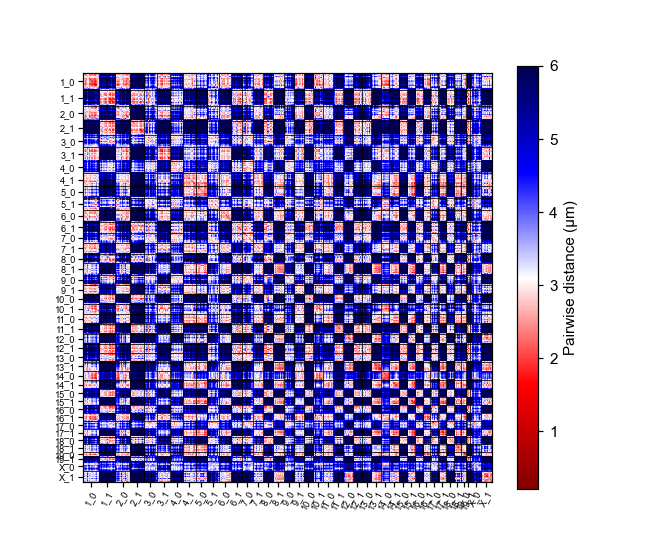

- Saving decoder into file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Decoder\Conv_zscan_003_Cell-6_Decoder.pkl


In [48]:
from ImageAnalysis3.classes import decode
reload(decode)
decode.batch_decode_DNA(spot_filenames[100], codebook_filename)

In [19]:
import multiprocessing as mp

In [49]:
decode_args = [(_fl, codebook_filename) for _fl in spot_filenames]
print(len(decode_args))

3192


In [50]:
%%time
with mp.Pool(12) as drift_pool:
    align_results = drift_pool.starmap(decode.batch_decode_DNA, decode_args, chunksize=1)
    drift_pool.close()
    drift_pool.join()
    drift_pool.terminate()
    

NameError: name 'num_threads' is not defined